In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

# Jax-001 Replacing dataloader with jax

## Goals
1. Replace the pytorch moving mnist dataset with Jax Making the sequence on the fly

## Conditions
1. L=3
2. seq_len=256

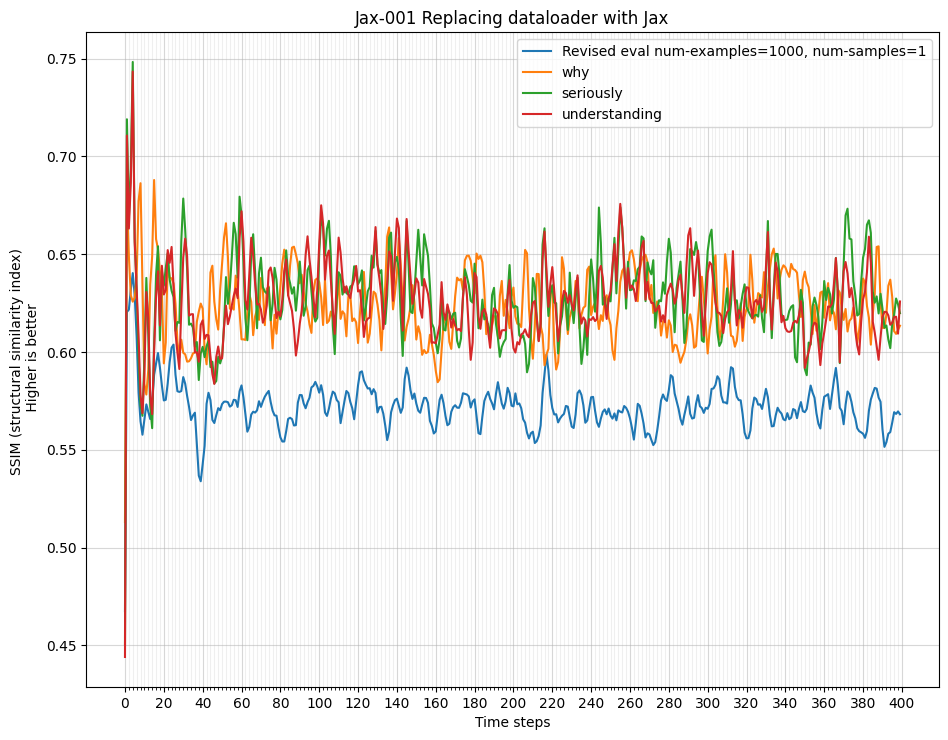

In [21]:
plot_title = "Jax-001 Replacing dataloader with Jax" 
x_limit = 400 

labels = []
labels.append('Revised eval num-examples=1000, num-samples=1')
labels.append('why')
labels.append('seriously')
labels.append('understanding')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_batch_10_examples_1000_20240326_193543/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_mistake_20240326_203738/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_seriously_20240326_202251/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_understanding_20240326_202510/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

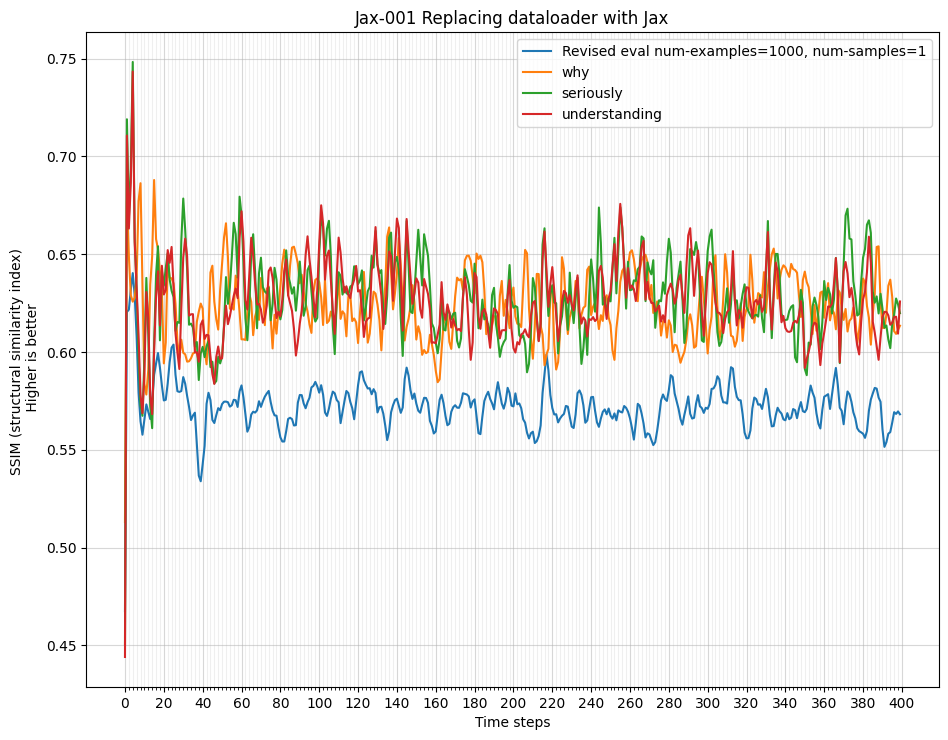

In [21]:
plot_title = "Jax-001 Replacing dataloader with Jax" 
x_limit = 400 

labels = []
labels.append('Revised eval num-examples=1000, num-samples=1')
labels.append('why')
labels.append('seriously')
labels.append('understanding')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_batch_10_examples_1000_20240326_193543/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_mistake_20240326_203738/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_seriously_20240326_202251/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-001_20240320_175512/eval_understanding_20240326_202510/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

# Jax-002-rev3-1 Replacing dataloader with jax

## Goals
1. Fix the flutuation in the Jax-001
2. Suspecting the underfitting
       - Use only 20 of MNIST patch to build MMNIST dataset 

## Conditions
1. L=3
2. seq_len=256

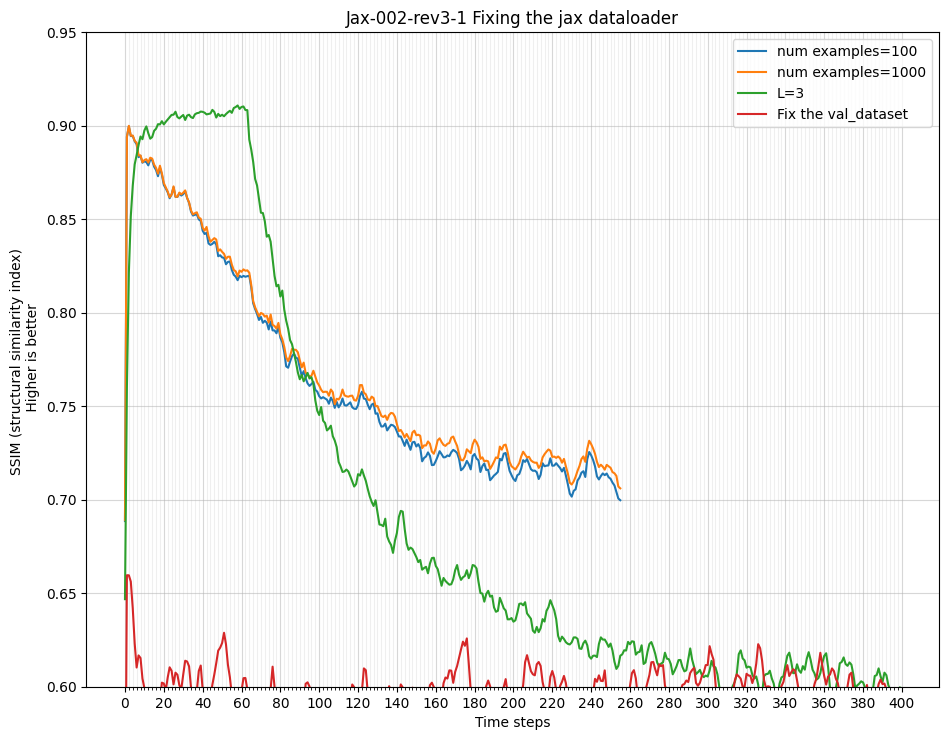

In [26]:
plot_title = "Jax-002-rev3-1 Fixing the jax dataloader" 
x_limit = 400 

labels = []
labels.append('num examples=100')
labels.append('num examples=1000')
labels.append('L=3')
labels.append('Fix the bug')
# labels.append('bs=8, # examples=100, # samples=1')
# labels.append('bs=8, # examples=10, # samples=1')
# labels.append('bs=1, # examples=2, # samples=1')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev3_20240412_121934/eval_jax-002-rev3_20240415_125950/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev3_20240412_121934/eval_jax-002-rev3-1_20240415_131220/ssim_mean.npz')
paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_100_num_sample_1_20240328_170301/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev4_20240415_152854/ssim_mean.npz')
# paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_10_num_sample_1_20240328_170612/ssim_mean.npz')
# paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_1_num_sample_1_20240328_170955/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.6,0.95)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

# Jax-002-rev4 Fixing the jaxMMNIST

## Goals
1. Fix the flutuation in the Jax-001
2. Suspecting the underfitting
       - Use only 20 of MNIST patch to build MMNIST dataset 

## Conditions
1. L=3
2. seq_len=256

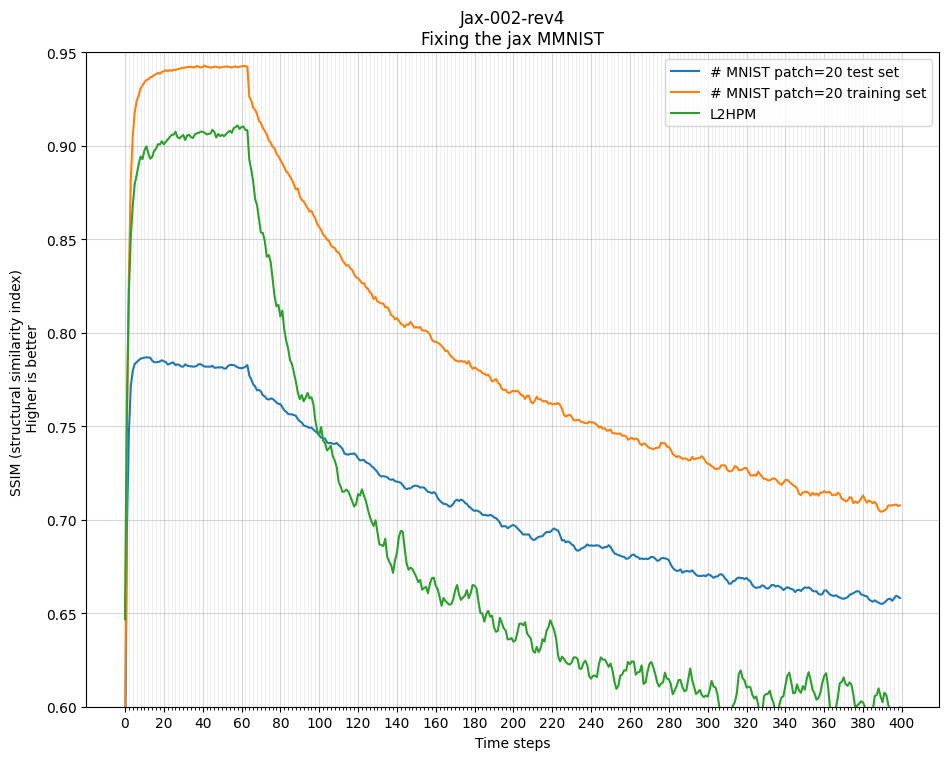

In [28]:
plot_title = "Jax-002-rev4\nFixing the jax MMNIST" 
x_limit = 400 

labels = []
labels.append('# MNIST patch=20 test set')
labels.append('# MNIST patch=20 training set')
labels.append('L2HPM')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev4_20240415_152854/eval_jax-002-rev4_20240416_163007/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev4_20240415_152854/eval_jax-002-rev4-1_same_condition_20240416_164333/ssim_mean.npz')
paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_100_num_sample_1_20240328_170301/ssim_mean.npz')
# paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_10_num_sample_1_20240328_170612/ssim_mean.npz')
# paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_1_num_sample_1_20240328_170955/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.6,0.95)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

# Jax-002-rev5 Fixing the jaxMMNIST

## Goals
1. Fix the flutuation in the Jax-001
2. Using 10k MNIST patches to build dataset

## Conditions
1. L=3
2. seq_len=256

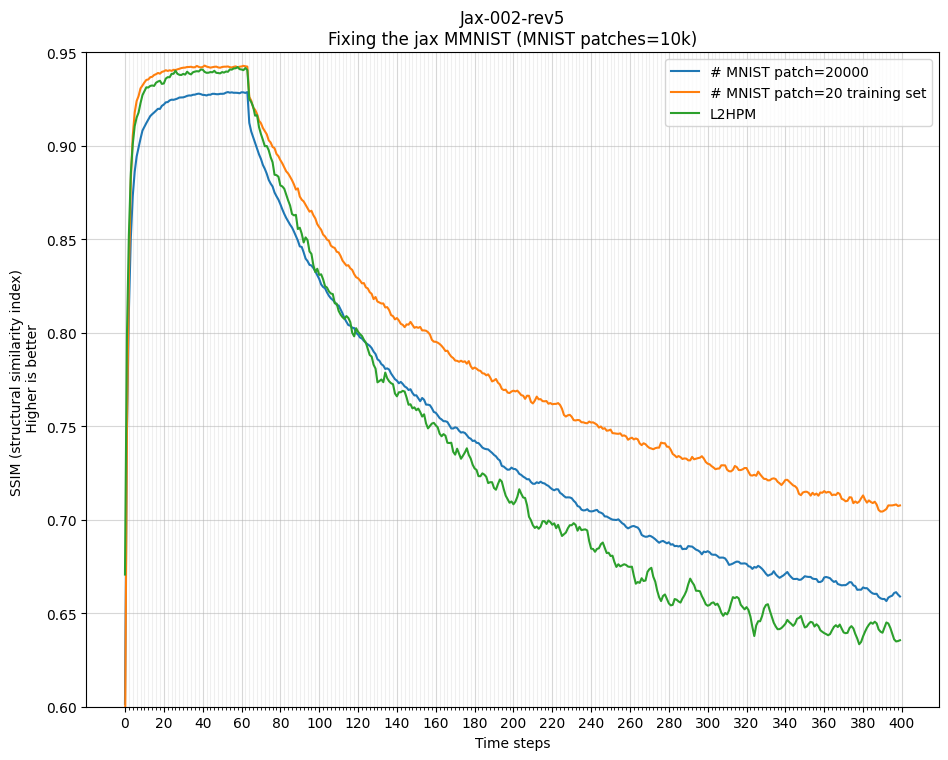

In [32]:
plot_title = "Jax-002-rev5\nFixing the jax MMNIST (MNIST patches=10k)" 
x_limit = 400 

labels = []
labels.append('# MNIST patch=20000')
labels.append('# MNIST patch=20 training set')
labels.append('L2HPM')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev5_20240415_172834/eval_jax-002-rev5_20240417_132058/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/jax-002-rev4_20240415_152854/eval_jax-002-rev4-1_same_condition_20240416_164333/ssim_mean.npz')
paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev6_20240328_174004/eval_rev6-2_200_bs_16_num_ex_1000_num_sample_1_20240412_124418/ssim_mean.npz')
# paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_10_num_sample_1_20240328_170612/ssim_mean.npz')
# paths.append('/home/intuinno/codegit/l2hpm/logs/mmnist/exp-051-3level-rev4_20240322_153528/eval_rev5-3_bs_8_num_ex_1_num_sample_1_20240328_170955/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.6,0.95)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

# EXP-051-rev7 Comparing L2 vs L3 

## Goals
1. Compare L2 vs L3 in the long epoch 300 -> 1000 

## Conditions
1. L=3
2. seq_len=256
3. Using 10k MNIST patches to build MMNIST

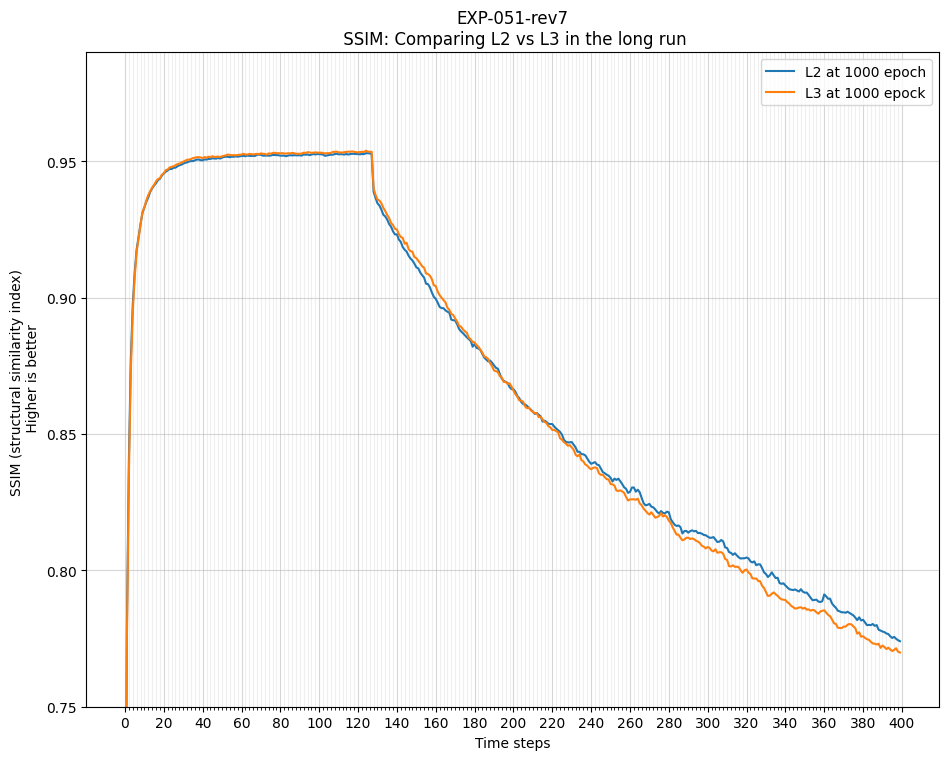

In [43]:
plot_title = "EXP-051-rev7\n SSIM: Comparing L2 vs L3 in the long run" 
x_limit = 400 

labels = []
labels.append('L2 at 1000 epoch')
labels.append('L3 at 1000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-sample3_20240422_105815/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3_20240422_104706/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.75,0.99)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

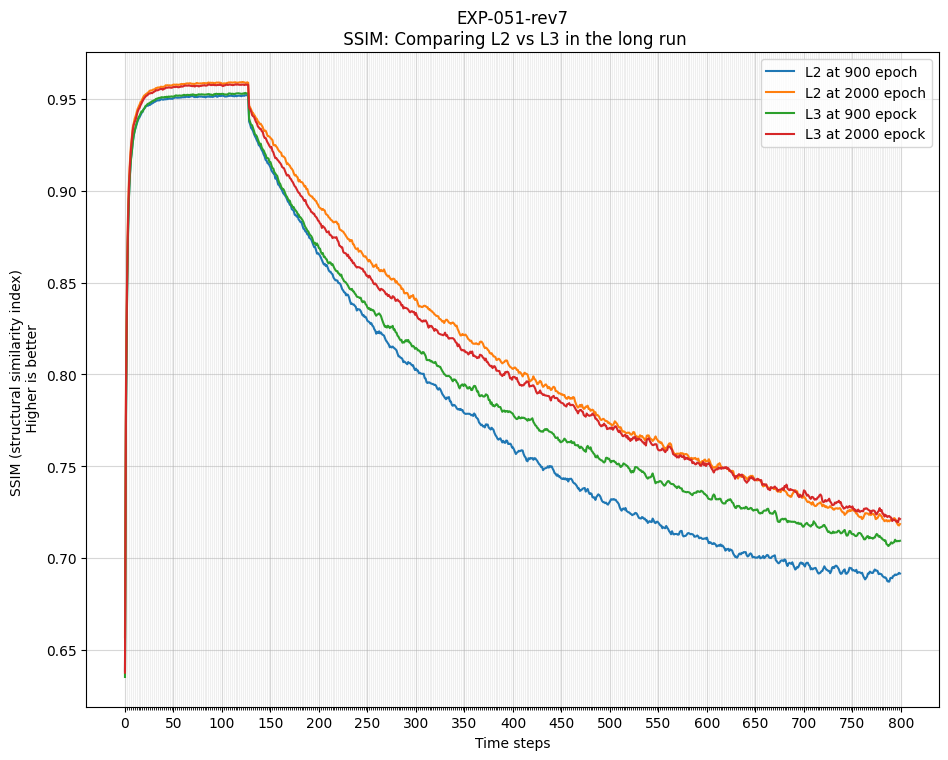

In [92]:
plot_title = "EXP-051-rev7\n SSIM: Comparing L2 vs L3 in the long run" 
x_limit = 800 

labels = []
labels.append('L2 at 900 epoch')
labels.append('L2 at 2000 epoch')
labels.append('L3 at 900 epock')
labels.append('L3 at 2000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-900_20240422_123959/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-final_20240430_160427/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-600_20240422_124328/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-final_20240430_153045/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

# plt.ylim(0.75,0.99)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 50)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("SSIM (structural similarity index) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

# EXP-051-rev7 Comparing L2 vs L3 

## Goals
1. Compare L2 vs L3 in the long epoch 300 -> 1000 

## Conditions
1. L=3
2. seq_len=256
3. Using 10k MNIST patches to build MMNIST

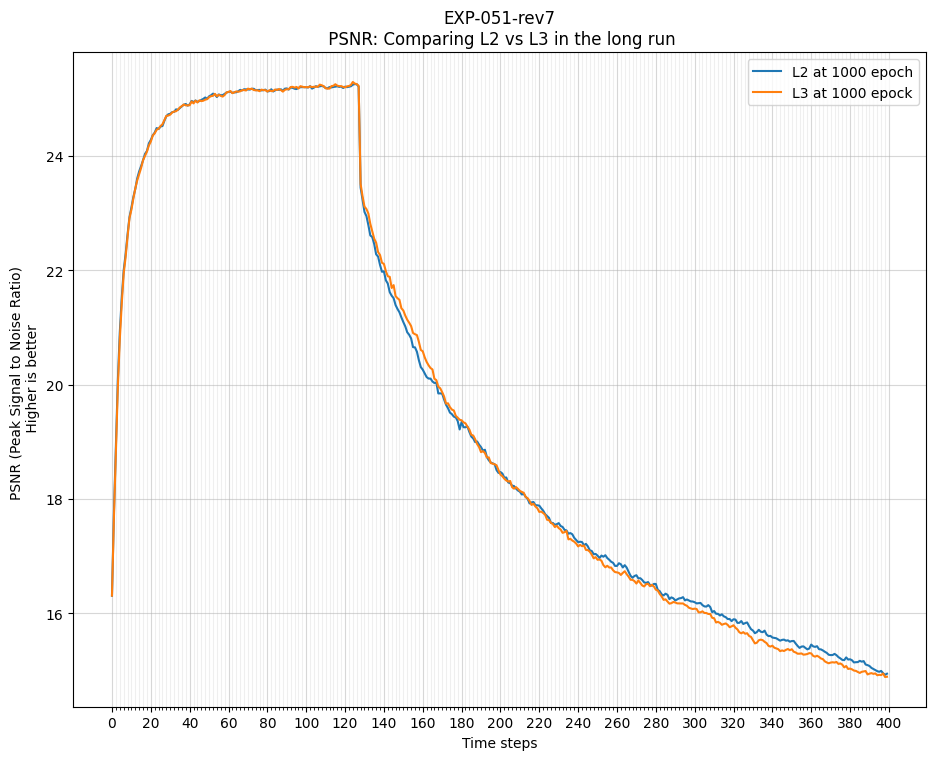

In [44]:
plot_title = "EXP-051-rev7\n PSNR: Comparing L2 vs L3 in the long run" 
x_limit = 400 

labels = []
labels.append('L2 at 1000 epoch')
labels.append('L3 at 1000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-sample3_20240422_105815/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3_20240422_104706/psnr_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

# plt.ylim(0.75,0.99)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

# EXP-051-rev7 Checking the progress of training

## Goals
1. Is 1000 epoch enough? Too much or too little how do I know?
2. View the progress of the training for L2

## Conditions
1. L=2
2. seq_len=256
3. Using 10k MNIST patches to build MMNIST
4. Compare 100, 200, ... 1000

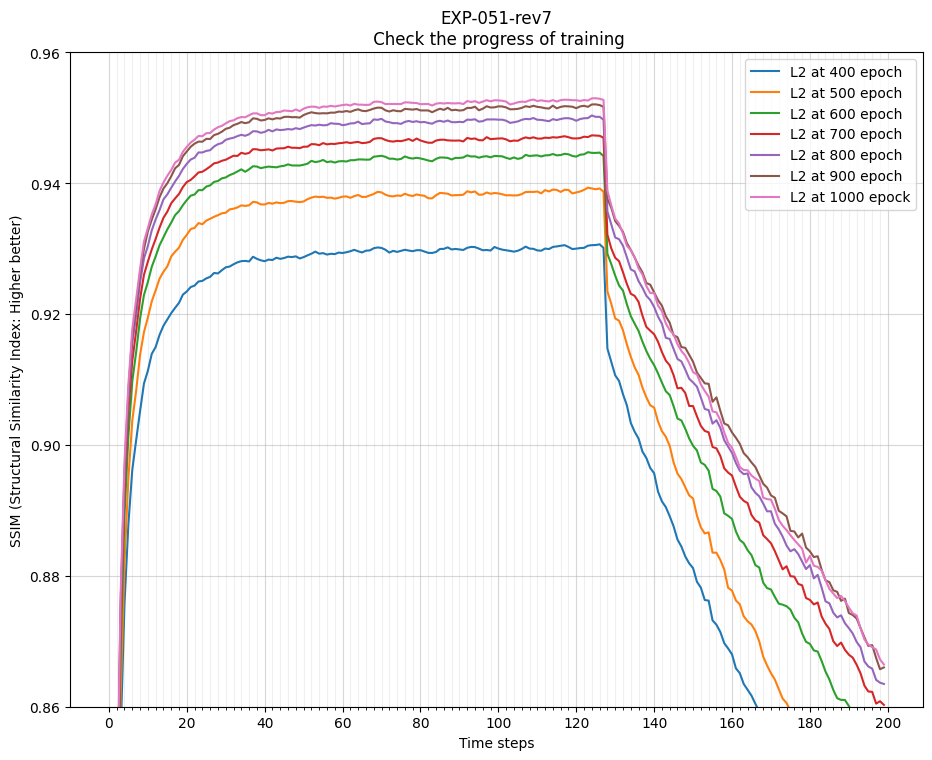

In [54]:
plot_title = "EXP-051-rev7\n Check the progress of training" 
x_limit = 200 

labels = []
labels.append('L2 at 400 epoch')
labels.append('L2 at 500 epoch')
labels.append('L2 at 600 epoch')
labels.append('L2 at 700 epoch')
labels.append('L2 at 800 epoch')
labels.append('L2 at 900 epoch')
labels.append('L2 at 1000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-400_20240422_142643/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-500_20240422_140412/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-600_20240422_134153/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-700_20240422_132106/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-800_20240422_130031/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-900_20240422_123959/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-sample3_20240422_105815/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.86,0.96)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
# plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.ylabel("SSIM (Structural Similarity Index: Higher better)")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

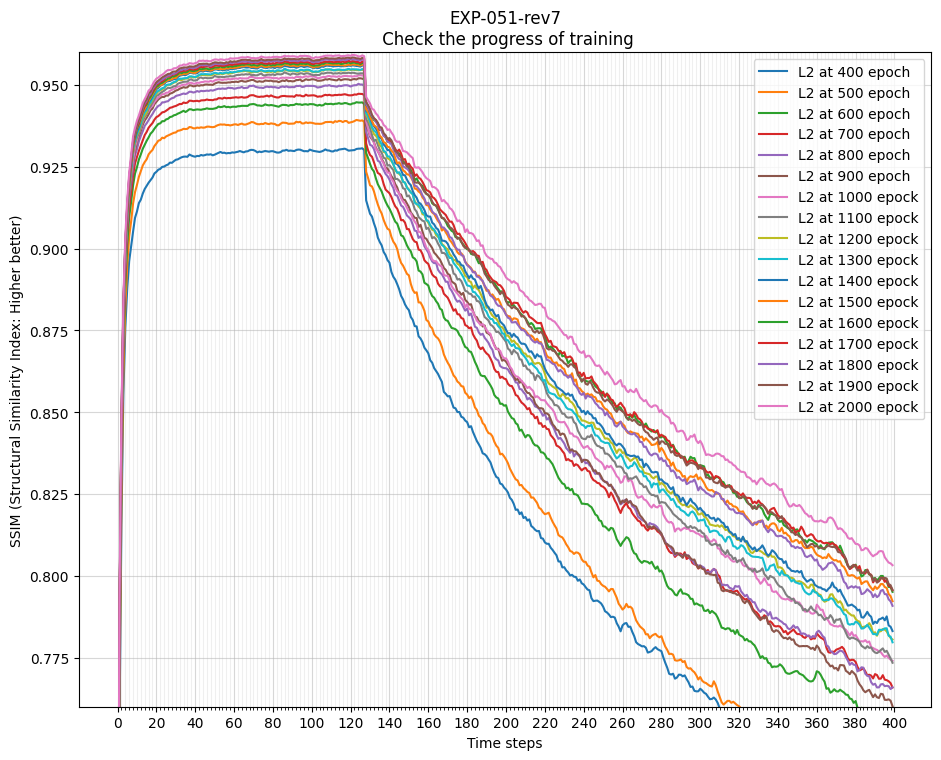

In [89]:
plot_title = "EXP-051-rev7\n Check the progress of training" 
x_limit = 400 

labels = []
labels.append('L2 at 400 epoch')
labels.append('L2 at 500 epoch')
labels.append('L2 at 600 epoch')
labels.append('L2 at 700 epoch')
labels.append('L2 at 800 epoch')
labels.append('L2 at 900 epoch')
labels.append('L2 at 1000 epock')
labels.append('L2 at 1100 epock')
labels.append('L2 at 1200 epock')
labels.append('L2 at 1300 epock')
labels.append('L2 at 1400 epock')
labels.append('L2 at 1500 epock')
labels.append('L2 at 1600 epock')
labels.append('L2 at 1700 epock')
labels.append('L2 at 1800 epock')
labels.append('L2 at 1900 epock')
labels.append('L2 at 2000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-400_20240422_142643/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-500_20240422_140412/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-600_20240422_134153/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-700_20240422_132106/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-800_20240422_130031/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-900_20240422_123959/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-sample3_20240422_105815/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-100_20240430_113938/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-200_20240430_120507/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-300_20240430_123018/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-400_20240430_125526/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-500_20240430_132014/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-600_20240430_134507/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-700_20240430_140949/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-800_20240430_143446/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-900_20240430_153947/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-final_20240430_160427/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.76,0.96)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
# plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.ylabel("SSIM (Structural Similarity Index: Higher better)")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

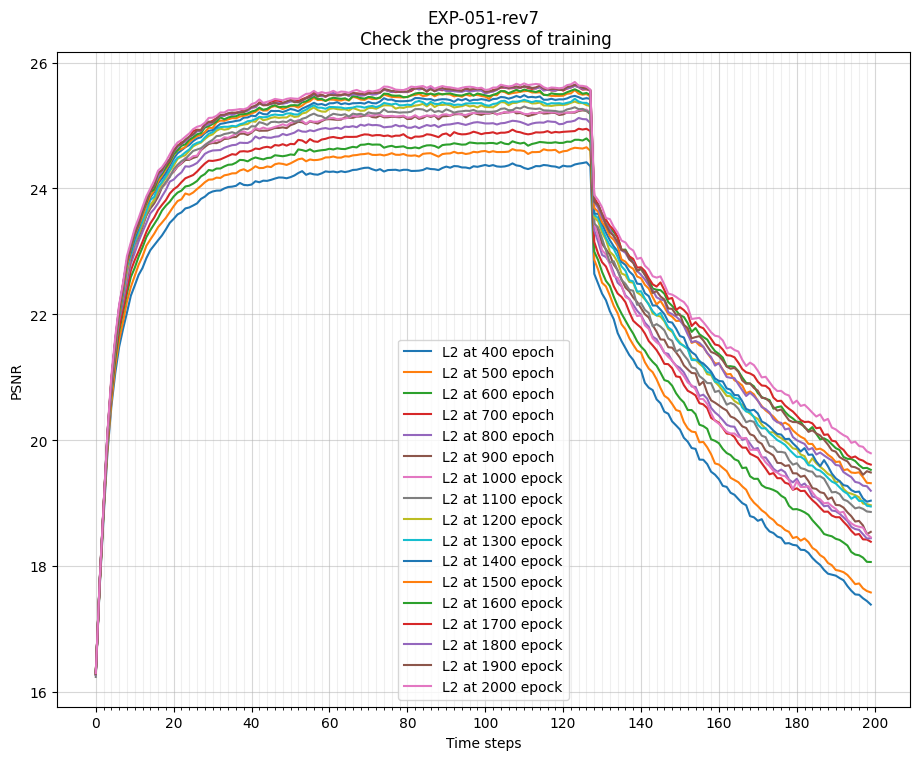

In [91]:
plot_title = "EXP-051-rev7\n Check the progress of training" 
x_limit = 200 

labels = []
labels.append('L2 at 400 epoch')
labels.append('L2 at 500 epoch')
labels.append('L2 at 600 epoch')
labels.append('L2 at 700 epoch')
labels.append('L2 at 800 epoch')
labels.append('L2 at 900 epoch')
labels.append('L2 at 1000 epock')
labels.append('L2 at 1100 epock')
labels.append('L2 at 1200 epock')
labels.append('L2 at 1300 epock')
labels.append('L2 at 1400 epock')
labels.append('L2 at 1500 epock')
labels.append('L2 at 1600 epock')
labels.append('L2 at 1700 epock')
labels.append('L2 at 1800 epock')
labels.append('L2 at 1900 epock')
labels.append('L2 at 2000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-400_20240422_142643/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-500_20240422_140412/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-600_20240422_134153/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-700_20240422_132106/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-800_20240422_130031/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-900_20240422_123959/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-sample3_20240422_105815/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-100_20240430_113938/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-200_20240430_120507/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-300_20240430_123018/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-400_20240430_125526/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-500_20240430_132014/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-600_20240430_134507/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-700_20240430_140949/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-800_20240430_143446/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-900_20240430_153947/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L2_20240422_152358/eval_exp-051-rev8-L2-final_20240430_160427/psnr_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

# plt.ylim(0.76,0.96)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
# plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.ylabel("PSNR")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

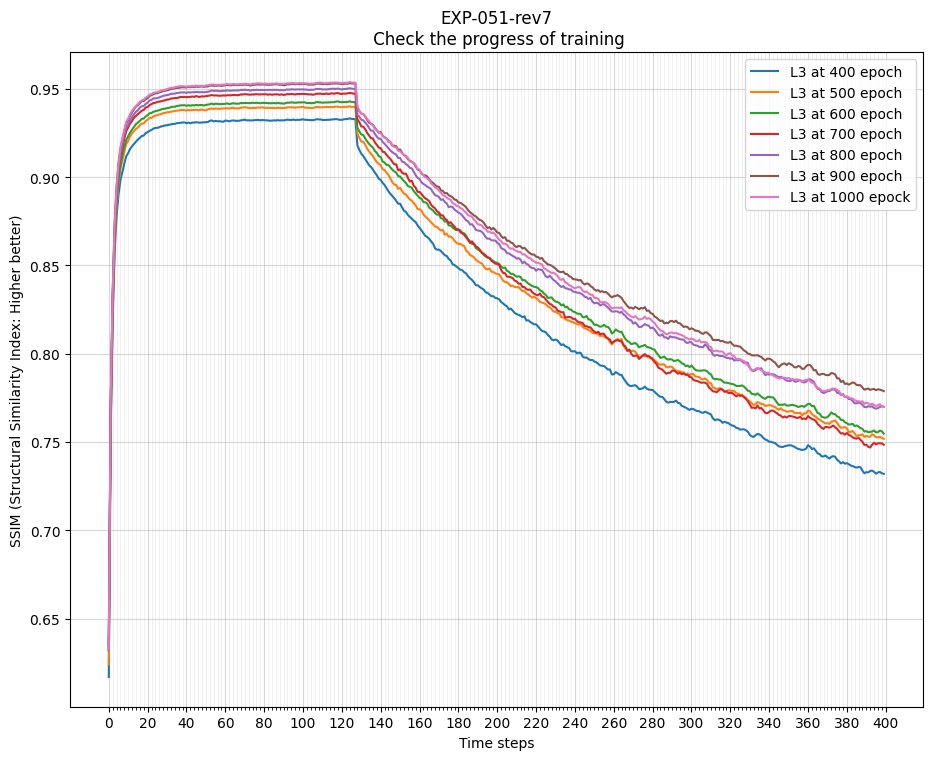

In [56]:
plot_title = "EXP-051-rev7\n Check the progress of training" 
x_limit = 400 

labels = []
labels.append('L3 at 400 epoch')
labels.append('L3 at 500 epoch')
labels.append('L3 at 600 epoch')
labels.append('L3 at 700 epoch')
labels.append('L3 at 800 epoch')
labels.append('L3 at 900 epoch')
labels.append('L3 at 1000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-100_20240422_143539/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-200_20240422_141153/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-300_20240422_134857/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-400_20240422_132550/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-500_20240422_130428/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-600_20240422_124328/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3_20240422_104706/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

# plt.ylim(0.86,0.96)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
# plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.ylabel("SSIM (Structural Similarity Index: Higher better)")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

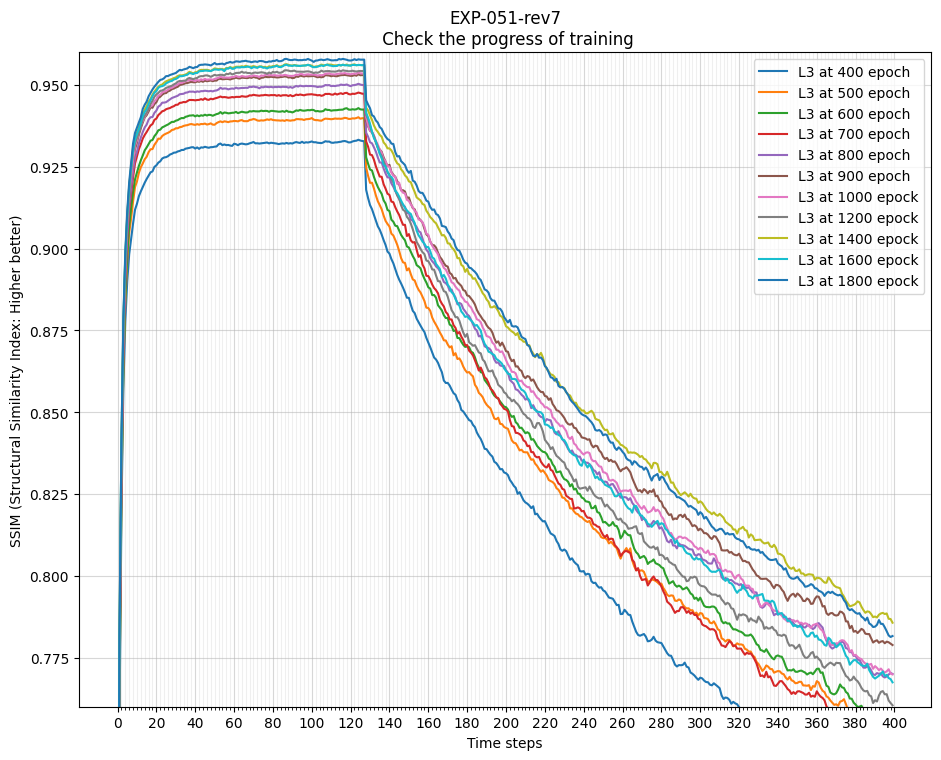

In [71]:
plot_title = "EXP-051-rev7\n Check the progress of training" 
x_limit = 400 

labels = []
labels.append('L3 at 400 epoch')
labels.append('L3 at 500 epoch')
labels.append('L3 at 600 epoch')
labels.append('L3 at 700 epoch')
labels.append('L3 at 800 epoch')
labels.append('L3 at 900 epoch')
labels.append('L3 at 1000 epock')
labels.append('L3 at 1200 epock')
labels.append('L3 at 1400 epock')
labels.append('L3 at 1600 epock')
labels.append('L3 at 1800 epock')
labels.append('L3 at 2000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-100_20240422_143539/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-200_20240422_141153/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-300_20240422_134857/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-400_20240422_132550/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-500_20240422_130428/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3-600_20240422_124328/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L3_20240417_140910/eval_exp-051-rev7-L3_20240422_104706/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-200_20240430_120707/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-400_20240430_125825/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-600_20240430_134929/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-800_20240430_144013/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.76,0.96)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
# plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.ylabel("SSIM (Structural Similarity Index: Higher better)")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

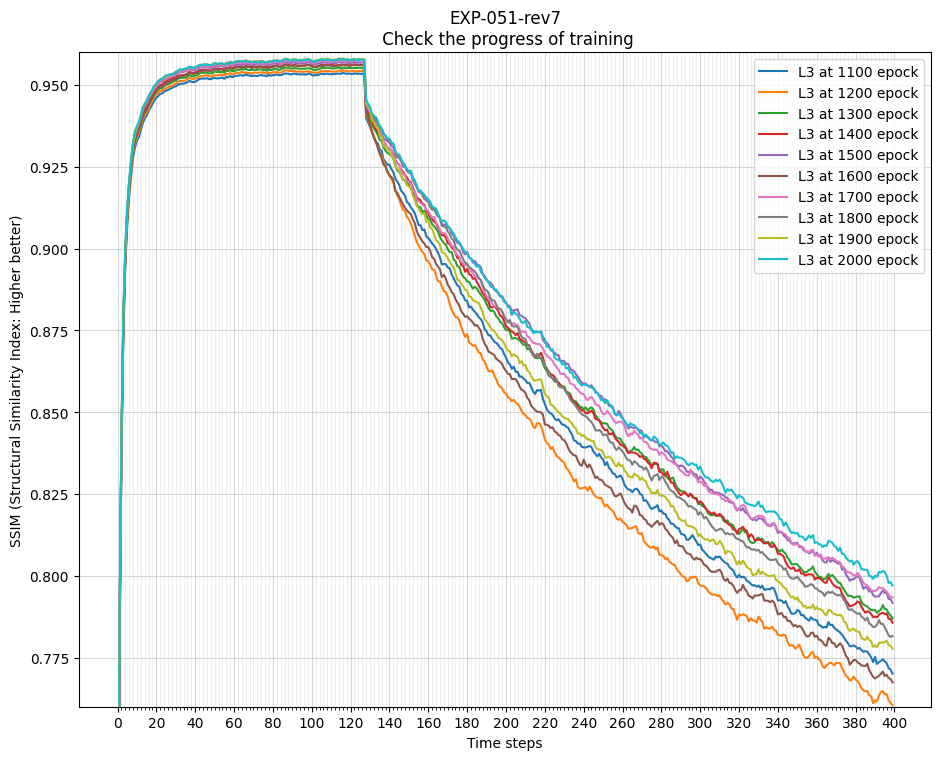

In [79]:
plot_title = "EXP-051-rev7\n Check the progress of training" 
x_limit = 400 

labels = []
labels.append('L3 at 1100 epock')
labels.append('L3 at 1200 epock')
labels.append('L3 at 1300 epock')
labels.append('L3 at 1400 epock')
labels.append('L3 at 1500 epock')
labels.append('L3 at 1600 epock')
labels.append('L3 at 1700 epock')
labels.append('L3 at 1800 epock')
labels.append('L3 at 1900 epock')
labels.append('L3 at 2000 epock')

paths = []
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-100_20240430_114119/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-200_20240430_120707/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-300_20240430_123243/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-400_20240430_125825/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-500_20240430_132403/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-600_20240430_134929/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-700_20240430_141453/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-800_20240430_144013/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-900_20240430_150529/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev8-L3_20240422_152440/eval_exp-051-rev8-L3-final_20240430_153045/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.76,0.96)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
# plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.ylabel("SSIM (Structural Similarity Index: Higher better)")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

# EXP-051-rev9 Checking the progress of training

## Goals
1. Is 1000 epoch enough? Too much or too little how do I know?
2. View the progress of the training for L2

## Conditions
1. L=2
2. seq_len=256
3. Using 10k MNIST patches to build MMNIST
4. Compare 100, 200, ... 1000

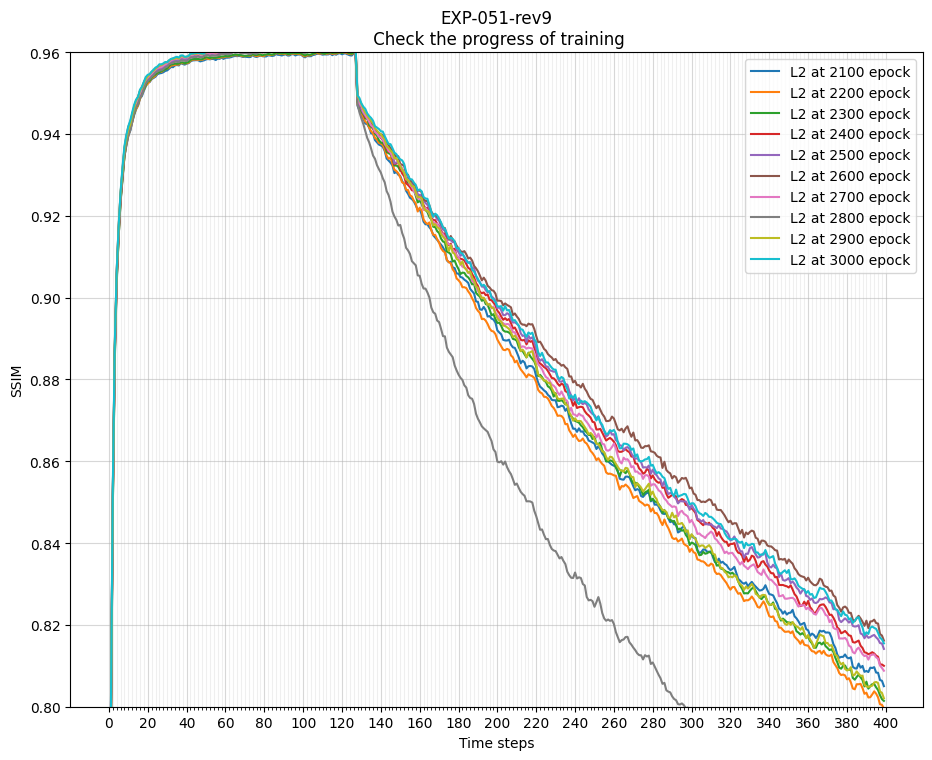

In [5]:
plot_title = "EXP-051-rev9\n Check the progress of training" 
x_limit = 400 

labels = []
# labels.append('L2 at 400 epoch')
# labels.append('L2 at 500 epoch')
# labels.append('L2 at 600 epoch')
# labels.append('L2 at 700 epoch')
# labels.append('L2 at 800 epoch')
# labels.append('L2 at 900 epoch')
# labels.append('L2 at 1000 epock')
labels.append('L2 at 2100 epock')
labels.append('L2 at 2200 epock')
labels.append('L2 at 2300 epock')
labels.append('L2 at 2400 epock')
labels.append('L2 at 2500 epock')
labels.append('L2 at 2600 epock')
labels.append('L2 at 2700 epock')
labels.append('L2 at 2800 epock')
labels.append('L2 at 2900 epock')
labels.append('L2 at 3000 epock')

paths = []
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-400_20240422_142643/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-500_20240422_140412/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-600_20240422_134153/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-700_20240422_132106/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-800_20240422_130031/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-900_20240422_123959/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-sample3_20240422_105815/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-100_20240506_194346/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-200_20240506_200822/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-300_20240506_203312/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-400_20240506_205803/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-500_20240506_212252/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-600_20240506_214727/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-700_20240506_221207/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-800_20240506_223653/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-900_20240506_230120/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L2_20240430_163626/eval_exp-051-rev9-L2-final_20240506_232547/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.80,0.96)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
# plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.ylabel("SSIM")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')

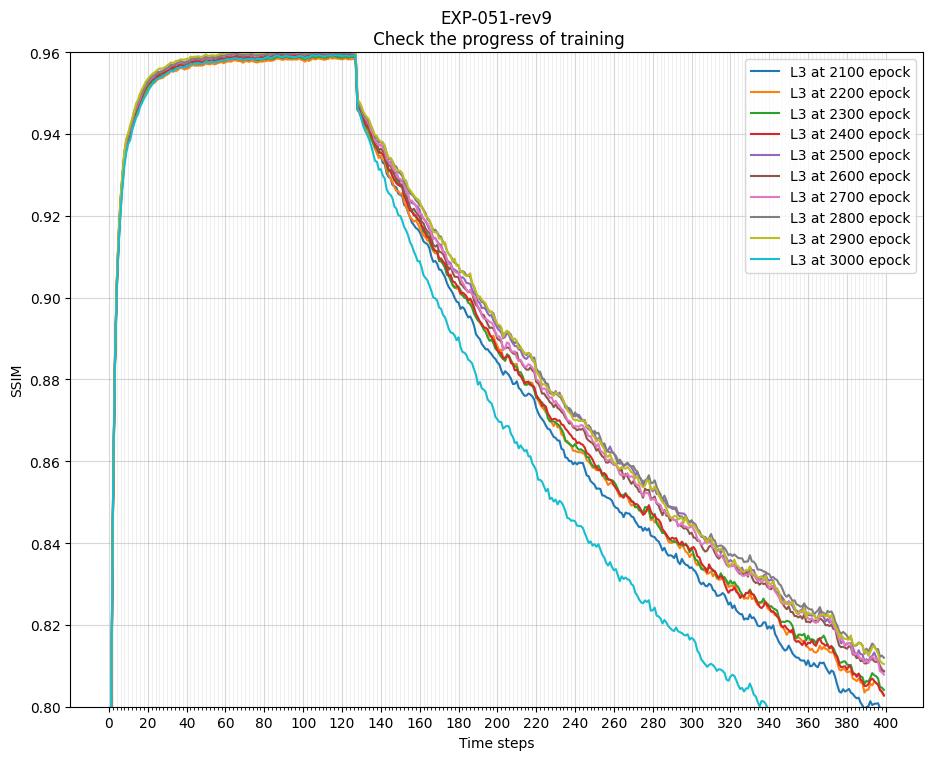

In [6]:
plot_title = "EXP-051-rev9\n Check the progress of training" 
x_limit = 400 

labels = []
# labels.append('L2 at 400 epoch')
# labels.append('L2 at 500 epoch')
# labels.append('L2 at 600 epoch')
# labels.append('L2 at 700 epoch')
# labels.append('L2 at 800 epoch')
# labels.append('L2 at 900 epoch')
# labels.append('L2 at 1000 epock')
labels.append('L3 at 2100 epock')
labels.append('L3 at 2200 epock')
labels.append('L3 at 2300 epock')
labels.append('L3 at 2400 epock')
labels.append('L3 at 2500 epock')
labels.append('L3 at 2600 epock')
labels.append('L3 at 2700 epock')
labels.append('L3 at 2800 epock')
labels.append('L3 at 2900 epock')
labels.append('L3 at 3000 epock')

paths = []
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-400_20240422_142643/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-500_20240422_140412/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-600_20240422_134153/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-700_20240422_132106/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-800_20240422_130031/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-900_20240422_123959/psnr_mean.npz')
# paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev7-L2_20240416_170015/eval_exp-051-rev7-L2-sample3_20240422_105815/psnr_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-100_20240506_194029/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-200_20240506_200534/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-300_20240506_203037/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-400_20240506_205540/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-500_20240506_212051/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-600_20240506_214558/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-700_20240506_221102/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-800_20240506_223607/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev9-L3-900_20240506_230106/ssim_mean.npz')
paths.append('/home/intuinno/codegit/jaxhpm/logs/jax_mmnist/exp-051-rev9-L3_20240430_163545/eval_exp-051-rev8-L3-final_20240506_232608/ssim_mean.npz')

plots = []
for p in paths:
    path = pathlib.Path(p)
    with open(path, 'rb') as f:
        plots.append(np.load(f)['arr_0'])

plt.figure(figsize=(11, 8.5))
axes = plt.gca()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

plt.ylim(0.80,0.96)

# Major ticks every 20, minor ticks every 2
major_ticks = np.arange(0, x_limit+1, 20)
minor_ticks = np.arange(0, x_limit+1, 2)

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)

# Or if you want different settings for the grids:
axes.grid(which='minor', alpha=0.2)
axes.grid(which='major', alpha=0.5)

for pl, label in zip(plots, labels):
    plt.plot(pl[:x_limit], label=label)

plt.legend()
plt.xlabel("Time steps")
# plt.ylabel("PSNR (Peak Signal to Noise Ratio) \n Higher is better")
plt.ylabel("SSIM")
plt.title(plot_title)

fig = plt.gcf()
plt.show()
fig.savefig(f'figure {plot_title}.png', bbox_inches='tight')